<div style="border: 6px solid #18453B; padding: 10px; border-radius: 5px;">
   <img src="https://ucanalytics.com/blogs/wp-content/uploads/2017/09/Logistic-Regression-Loss-Function-3D-plot.jpg" alt="Placeholder image">
    <h1 style="color: #4CAF50;">Week 07: Linear Regression</h1>
    <p>Let's explore regression, loss function and model sensitivity.</p>
 
</div>


### Instructions for Submitting

Please follow the format below when typing your names in the notebook. This is **mandatory** for all group submissions.
**Each group** will turn in one notebook. Note that this is different from the first ICA. You will still work together, but you will come up with your own answers.

- Each member's name must be written in the format:  
  **Last Name, First Name, Second Name**
- Separate each member's name with a **semicolon (;)**
- Do **not** include any extra text or formatting.
- **Delete this instruction text** and replace it with your names.

#### Example:
    Doe, Jane Marie; Smith, John Alan; Lee, Anna Grace;

⚠️ **Failure to follow this format will result in a reduction of your grade.**

Put your names in the next markdown cell

_Remove this text and add your names_

---

## Fake Data

Your first task is to define some functions. Have each person in your group invent their own function - or maybe three, or maybe five. Be inventive and creative: explore. These are the functions that you will use to make fake, noisy data from;then, you will fit to that data. 

Here is just one way you might do this. (Do this however your group likes to think about this.)

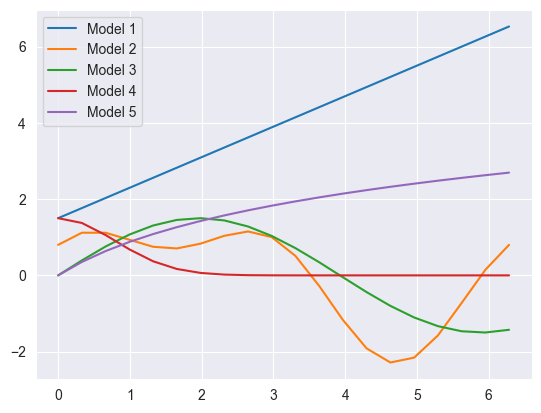

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# group member 1
def my_function_1(x, A, B):
    return A + B * x

# group member 2
def my_function_2(x, A, B):
    return A*np.sin(x) + B*np.cos(2*x) # is this linear?

# group member 3
def my_function_3(x, A, B):
    return A*np.sin(B*x) # is this linear?

def my_function_4(x, A, B):
    return A * np.exp(-B * x**2)

def my_function_5(x, A, B):
    return A * np.log(B * x + 1)


def my_function(x, A, B, which_model):
    match which_model:
        case 1:
            return my_function_1(x, A, B)
        case 2:
            return my_function_2(x, A, B)
        case 3:
            return my_function_3(x, A, B)
        case 4:
            return my_function_4(x, A, B)
        case 5:
            return my_function_5(x, A, B)
        case _:
            print("I need a valid number!")

x = np.linspace(0, 2 * np.pi, 20) # vary the number of points
true_A, true_B = 1.5, 0.8

plt.plot(x, my_function(x, true_A, true_B, 1))
plt.plot(x, my_function(x, true_A, true_B, 2))
plt.plot(x, my_function(x, true_A, true_B, 3))
plt.plot(x, my_function(x, true_A, true_B, 4))
plt.plot(x, my_function(x, true_A, true_B, 5))
plt.legend(['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'])

Now that you have a set of true functions, let's add noise to them to make them more like real data. Write some functions to do this, which might look like:

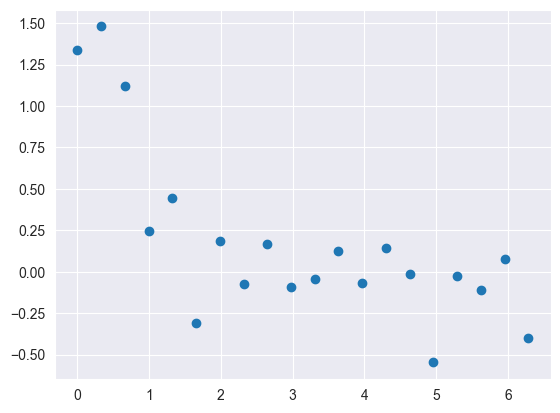

In [34]:
# finish this code by adding your functions to it and commenting it
# also, greatly improve the visualization

def generate_data(A, B, x, my_func, noise_level=0.2): # vary the level of noise
    y = my_func(x, A, B) + np.random.normal(0, noise_level, x.shape)
    return y

y_1 = generate_data(true_A, true_B, x, my_function_1)
y_2 = generate_data(true_A, true_B, x, my_function_2)
y_3 = generate_data(true_A, true_B, x, my_function_3)
y_4 = generate_data(true_A, true_B, x, my_function_4)
y_5 = generate_data(true_A, true_B, x, my_function_5)

# plot of the models your group has proposed
plt.plot(x, y_4, 'o')

---
## Grid Search

Next, we are going to explore the loss function. Modify the code below to plot the loss function. You will perform a grid search on this loss function so it is important to think through the ranges of the parameters you are seeking before making this plot. 

In [35]:
def grid_search(x, y, A_range, B_range, which):
    loss = np.zeros((len(A_range), len(B_range)))
    for i, A in enumerate(A_range):
        for j, B in enumerate(B_range):
            y_pred = my_function(x, A, B, which)
            loss[i, j] = np.mean((y - y_pred) ** 2) # mean squared error
    return loss

A_range = np.linspace(0, 2, 500) # you will definitely want to change this!! wider search and more grid points
B_range = np.linspace(0, 1, 400)
loss_1 = grid_search(x, y_1, A_range, B_range, 1)
loss_2 = grid_search(x, y_2, A_range, B_range, 2) # add the others from your group

What did this code do? What is in the variable `loss_1`?

In [36]:
loss_1

array([[18.56240976, 18.48447524, 18.40671039, ...,  0.95944345,
         0.94886771,  0.93846163],
       [18.53019107, 18.45231966, 18.37461793, ...,  0.95228163,
         0.941769  ,  0.93142605],
       [18.4980045 , 18.42019621, 18.34255759, ...,  0.94515194,
         0.93470243,  0.92442259],
       ...,
       [ 6.50973488,  6.46316879,  6.41677237, ...,  1.3600361 ,
         1.38082879,  1.40179115],
       [ 6.49348399,  6.44698102,  6.40064772, ...,  1.36884209,
         1.3896979 ,  1.41072337],
       [ 6.47726523,  6.43082538,  6.38455519, ...,  1.37768021,
         1.39859913,  1.41968772]], shape=(500, 400))

What you to do is find the lowest value in this array and connect those to which values of $A$ and $B$ gave that lowest value. How can you do that? The simplest way would be to rewrite the code to loop over $A$ and $B$, compute the loss at each value, and store the lowest values of the parameters seen. 

Feel free to do it that way if your group wishes. It is the clearest way to think about finding the minimum value of the loss because it is a brute force check on all of the values. 

Before you get too far, however, be sure that your grid search is spanning the ranges of the parameters that bracket the minimum. For this simple problem with only two parameters you can plot the loss to ensure you have bracketed the minimum. Here is some code to start with.

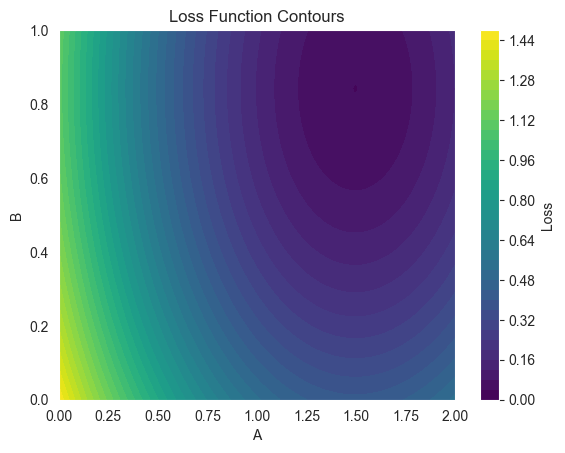

In [37]:
def plot_loss_function_contours(A_range, B_range, loss):
    A_grid, B_grid = np.meshgrid(A_range, B_range)
    plt.contourf(A_grid, B_grid, loss.T, levels=40, cmap='viridis')
    plt.colorbar(label='Loss')
    plt.title('Loss Function Contours')
    plt.xlabel('A')
    plt.ylabel('B')
    plt.show()

plot_loss_function_contours(A_range, B_range, loss_2)



Ok, if your group doesn't want to write the double `for` loops over $A$ and $B$ to store the minimum loss, we can learn a bit of fancy Python to do this in one step. 

Work through this code with your group. 
* what does `argmin` mean? (this is important notation in optimization!)
* what does `argmin` return? a number? two numbers? an array? 
* what does `unravel_index` do? 
* why does `unravel_index` require two arguments, and what is `.shape` returning?

In [43]:
np.argmin(loss_1)

np.int64(148722)

In [38]:
min_index = np.unravel_index(np.argmin(loss_1), loss_1.shape)
print(min_index)

(np.int64(371), np.int64(322))


---
## Get the best parameters and plot the prediction

In [39]:
def find_best_fit_params(loss, A_range, B_range):
    best_idx = np.unravel_index(np.argmin(loss), loss.shape)
    A_best, B_best = A_range[best_idx[0]], B_range[best_idx[1]]
    return A_best, B_best

A_best_1, B_best_1 = find_best_fit_params(loss_1, A_range, B_range) # include all of the models from your group
A_best_2, B_best_2 = find_best_fit_params(loss_2, A_range, B_range) # include all of the models from your group


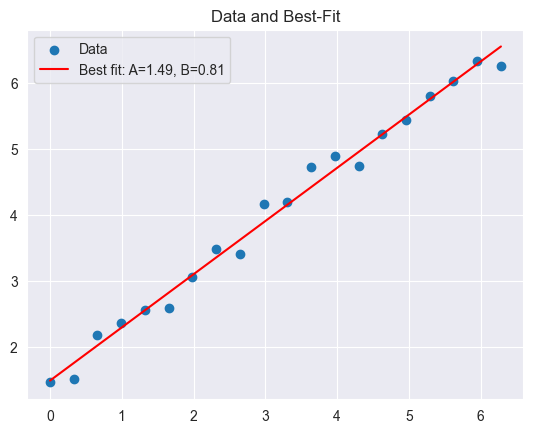

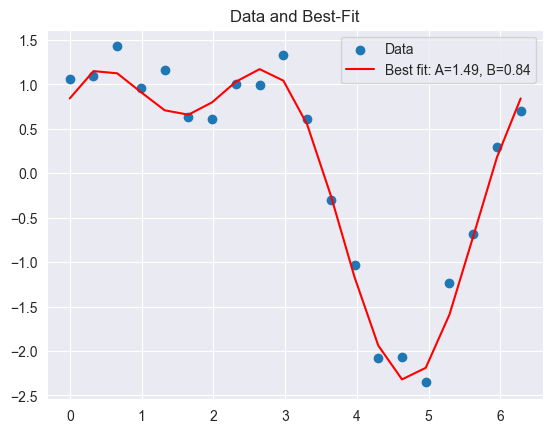

In [40]:
def plot_data_and_best_fit(x, y, A_best, B_best, which):
    plt.scatter(x, y, label='Data')
    y_fit = my_function(x, A_best, B_best, which)
    plt.plot(x, y_fit, 'r-', label=f'Best fit: A={A_best:.2f}, B={B_best:.2f}')
    plt.title('Data and Best-Fit')
    plt.legend()
    plt.show()

plot_data_and_best_fit(x, y_1, A_best_1, B_best_1, 1)

plot_data_and_best_fit(x, y_2, A_best_2, B_best_2, 2)

---
## Sensitivity Analysis

You have noticed that sometimes the loss function has a broad minimum. This means that the value of the loss near the minimum is not too sensitive to the values of the parameters. We can perform a sensitivity analysis on this to quantitfy how sensitive our model is to the final values of its parameters.  First let's visualize the size and shape of the loss's minimum. Modify this to code to work with the cases your group is considering. 

Again, be sure your grid search is spanning an appropriate range of parameters!

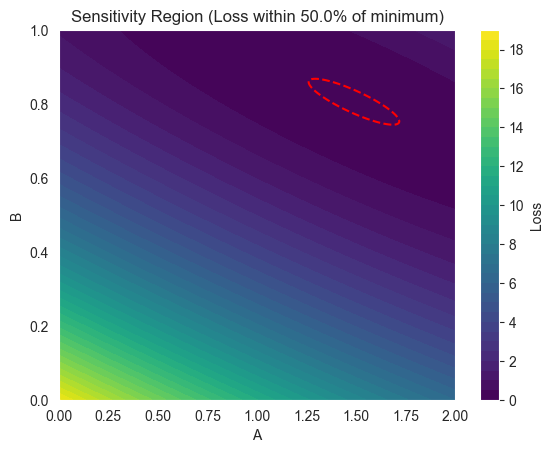

In [41]:
def plot_confidence_region(A_range, B_range, loss, loss_min, threshold=0.05):
    A_grid, B_grid = np.meshgrid(A_range, B_range)
    
    # Plot the loss function contours
    plt.contourf(A_grid, B_grid, loss.T, levels=40, cmap='viridis')
    plt.colorbar(label='Loss')

    # Overlay the region where the loss is within the specified threshold
    plt.contour(A_grid, B_grid, loss.T, levels=[loss_min * (1 + threshold)], colors='red', linestyles='dashed')
    
    plt.title(f'Sensitivity Region (Loss within {threshold*100}% of minimum)')
    plt.xlabel('A')
    plt.ylabel('B')
    plt.show()

loss_min = np.min(loss_1)
plot_confidence_region(A_range, B_range, loss_1, loss_min, threshold=0.5) # vary the threshold - it will be quite different for each model

Finally, we can sample values of $A$ and $B$ inside that red contour. These are "reasonable" values of the parameters -- they yield nearly the same loss -- but they all give different predictions. Let explore this sensitivity. Comment this code. 

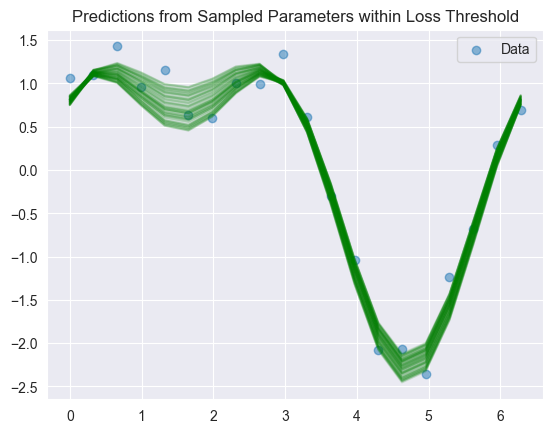

In [42]:
def sample_within_loss_threshold(A_range, B_range, loss, loss_min, threshold=0.05):
    # Sample within a region where the loss is within the threshold
    valid_indices = np.where(loss <= loss_min * (1 + threshold))
    
    A_valid = A_range[valid_indices[0]]
    B_valid = B_range[valid_indices[1]]
    
    # Randomly sample from these valid (A, B) pairs
    idxs = np.random.choice(len(A_valid), size=1000, replace=True)
    A_samples = A_valid[idxs]
    B_samples = B_valid[idxs]
    
    return A_samples, B_samples
    
def plot_sampled_predictions(x, y, A_samples, B_samples, which):
    plt.scatter(x, y, label='Data', alpha=0.5)

    for A, B in zip(A_samples[:100], B_samples[:100]):
        y_sample = my_function(x, A, B, which)
        plt.plot(x, y_sample, 'g-', alpha=0.1)
    
    plt.title('Predictions from Sampled Parameters within Loss Threshold')
    plt.legend()
    plt.show()

A_samples, B_samples = sample_within_loss_threshold(A_range, B_range, loss_1, loss_min, threshold=0.5) # add other models from your group
plot_sampled_predictions(x, y_2, A_samples, B_samples, 2) # add other models from your group

______

Write a summary of your findings. You might include:
* what types of functions did your group use? linear? non-linear? did it matter? if so, why? if not, why not?
* what happened to the results in general as you varied the number of data points, or the range of the $x$ values? 
* what did you observe as the noise level was varied? 
* what were some issues with the grid search? 
* and so on.....you get the idea.....

✏️ **Answer** Put your reflections and questions in this cell

---

## Congratulations, you’re done!

Submit this assignment by uploading it to the course Desire2Learn web page. Go to the “In-class assignments” folder, find the appropriate submission link, and upload it there.

&#169; Copyright 2025, Department of Computational Mathematics, Science and Engineering at Michigan State University.